<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/agrismartsystem/blob/main/AnaliseSensor/testedeBlandAltman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [7]:
read_file = pd.read_excel ("/content/dadosvalidacaosensorPH2.xlsx")

In [8]:
read_file.to_csv ("/content/dadosvalidacaosensorPH.csv",
                  index = None,
                  header=True)

In [9]:
df = pd.DataFrame(pd.read_csv("/content/dadosvalidacaosensorPH.csv"))


In [10]:
df

,indice,pH_Meio_Aquoso,pH_Medicao_Direta_Akso,pH_ESP_vali(equa_linear)
0,1,6.70,6.80,6.74
1,2,7.20,7.15,7.90
2,3,7.40,7.37,6.78
3,4,7.20,6.84,7.15
4,5,4.30,4.60,4.26
5,6,7.30,6.95,6.41
6,7,7.50,7.30,6.85
7,8,7.00,7.02,7.87
8,9,4.60,4.83,5.24
9,10,5.10,5.36,5.21


In [17]:
# Dados
indice = np.arange(1, 41)
pH_Meio_Aquoso = np.array([6.70, 7.20, 7.40, 7.20, 4.30, 7.30, 7.50, 7.00, 4.60, 5.10, 6.10, 5.70, 5.40, 6.80, 4.40, 8.10, 6.00, 6.40, 7.41, 6.60, 9.00, 8.50, 4.60, 7.00, 6.00, 4.50, 4.50, 8.10, 8.80, 10.16, 6.40, 6.60, 4.20, 7.50, 6.20, 4.30, 4.90, 4.10, 4.70, 9.50])
pH_ESP_vali_eq_linear = np.array([6.74, 7.90, 6.78, 7.15, 4.26, 6.41, 6.85, 7.87, 5.24, 5.21, 6.41, 6.30, 4.88, 6.68, 5.35, 8.05, 6.35, 6.72, 7.18, 6.42, 8.62, 8.09, 5.44, 7.85, 5.93, 4.24, 5.62, 7.64, 8.31, 9.88, 6.12, 5.82, 4.77, 7.80, 6.23, 4.11, 4.81, 4.80, 5.44, 9.60])


In [18]:
# Calcular as diferenças e as médias
diferencas = pH_Meio_Aquoso - pH_ESP_vali_eq_linear
medias = 0.5 * (pH_Meio_Aquoso + pH_ESP_vali_eq_linear)


In [19]:
# Realizar o Teste de Bland-Altman
mean_diff = np.mean(diferencas)
std_diff = np.std(diferencas, ddof=1)  # Use ddof=1 for sample standard deviation


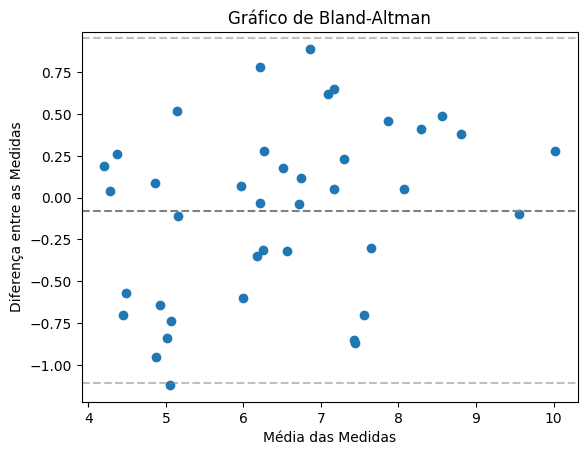

In [20]:
# Plotar o gráfico Bland-Altman
plt.scatter(medias, diferencas)
plt.axhline(mean_diff, color='gray', linestyle='--')
plt.axhline(mean_diff + 1.96 * std_diff, color='gray', linestyle='--', alpha=0.5)
plt.axhline(mean_diff - 1.96 * std_diff, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Média das Medidas')
plt.ylabel('Diferença entre as Medidas')
plt.title('Gráfico de Bland-Altman')
plt.show()

In [21]:
# Imprimir os resultados do teste
print('Média das diferenças:', mean_diff)
print('Limite superior de concordância:', mean_diff + 1.96 * std_diff)
print('Limite inferior de concordância:', mean_diff - 1.96 * std_diff)

Média das diferenças: -0.07749999999999999
Limite superior de concordância: 0.9530197324526878
Limite inferior de concordância: -1.1080197324526877


In [22]:
# Dados
data = {
    'indice': range(1, 41),
    'pH_Meio_Aquoso': [6.70, 7.20, 7.40, 7.20, 4.30, 7.30, 7.50, 7.00, 4.60, 5.10, 6.10, 5.70, 5.40, 6.80, 4.40, 8.10, 6.00, 6.40, 7.41, 6.60, 9.00, 8.50, 4.60, 7.00, 6.00, 4.50, 4.50, 8.10, 8.80, 10.16, 6.40, 6.60, 4.20, 7.50, 6.20, 4.30, 4.90, 4.10, 4.70, 9.50],
    'pH_ESP_vali_eq_linear': [6.74, 7.90, 6.78, 7.15, 4.26, 6.41, 6.85, 7.87, 5.24, 5.21, 6.41, 6.30, 4.88, 6.68, 5.35, 8.05, 6.35, 6.72, 7.18, 6.42, 8.62, 8.09, 5.44, 7.85, 5.93, 4.24, 5.62, 7.64, 8.31, 9.88, 6.12, 5.82, 4.77, 7.80, 6.23, 4.11, 4.81, 4.80, 5.44, 9.60]
}

# Criar DataFrame
df = pd.DataFrame(data)

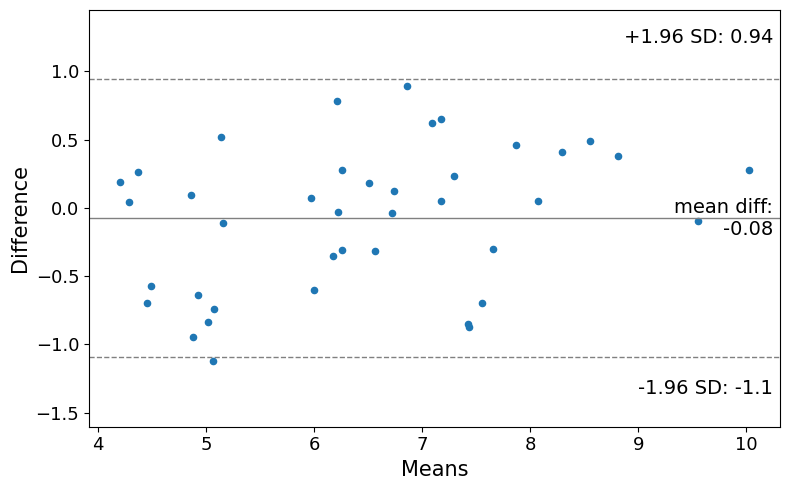

In [23]:
# Criar Bland-Altman plot
f, ax = plt.subplots(1, figsize=(8, 5))
sm.graphics.mean_diff_plot(df['pH_Meio_Aquoso'], df['pH_ESP_vali_eq_linear'], ax=ax)

# Mostrar o Bland-Altman plot
plt.show()